In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
os.chdir(r"C:\Users\ghosa\Projects\ML\ass1\diabetes")

In [6]:
dataset = pd.read_csv('diabetes.data')
dataset.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [7]:
X=dataset.drop(['SEX','Y'],axis=1)
y=dataset['SEX']

In [8]:
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size = 0.4)

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [11]:
from sklearn.metrics import classification_report,confusion_matrix

In [12]:
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))

Confusion Matrix:
[[54 38]
 [44 41]]


In [13]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.55      0.59      0.57        92
           2       0.52      0.48      0.50        85

    accuracy                           0.54       177
   macro avg       0.54      0.53      0.53       177
weighted avg       0.54      0.54      0.54       177



In [14]:
from sklearn import tree
text_representation = tree.export_text(classifier)
print(text_representation)

|--- feature_5 <= 44.50
|   |--- feature_7 <= 5.06
|   |   |--- feature_2 <= 87.67
|   |   |   |--- feature_3 <= 185.50
|   |   |   |   |--- feature_0 <= 42.00
|   |   |   |   |   |--- feature_0 <= 32.50
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- feature_0 >  32.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  42.00
|   |   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  185.50
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  87.67
|   |   |   |--- feature_8 <= 118.50
|   |   |   |   |--- feature_7 <= 4.48
|   |   |   |   |   |--- feature_0 <= 56.00
|   |   |   |   |   |   |--- feature_8 <= 86.00
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |--- feature_8 >  86.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_0 >  56.00
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_7 >  4.48
|   |   |   |   |   |--- class: 2
|   |   |   |--- feature_8 >  118.50
|   |   |  

In [15]:
from sklearn.tree import plot_tree

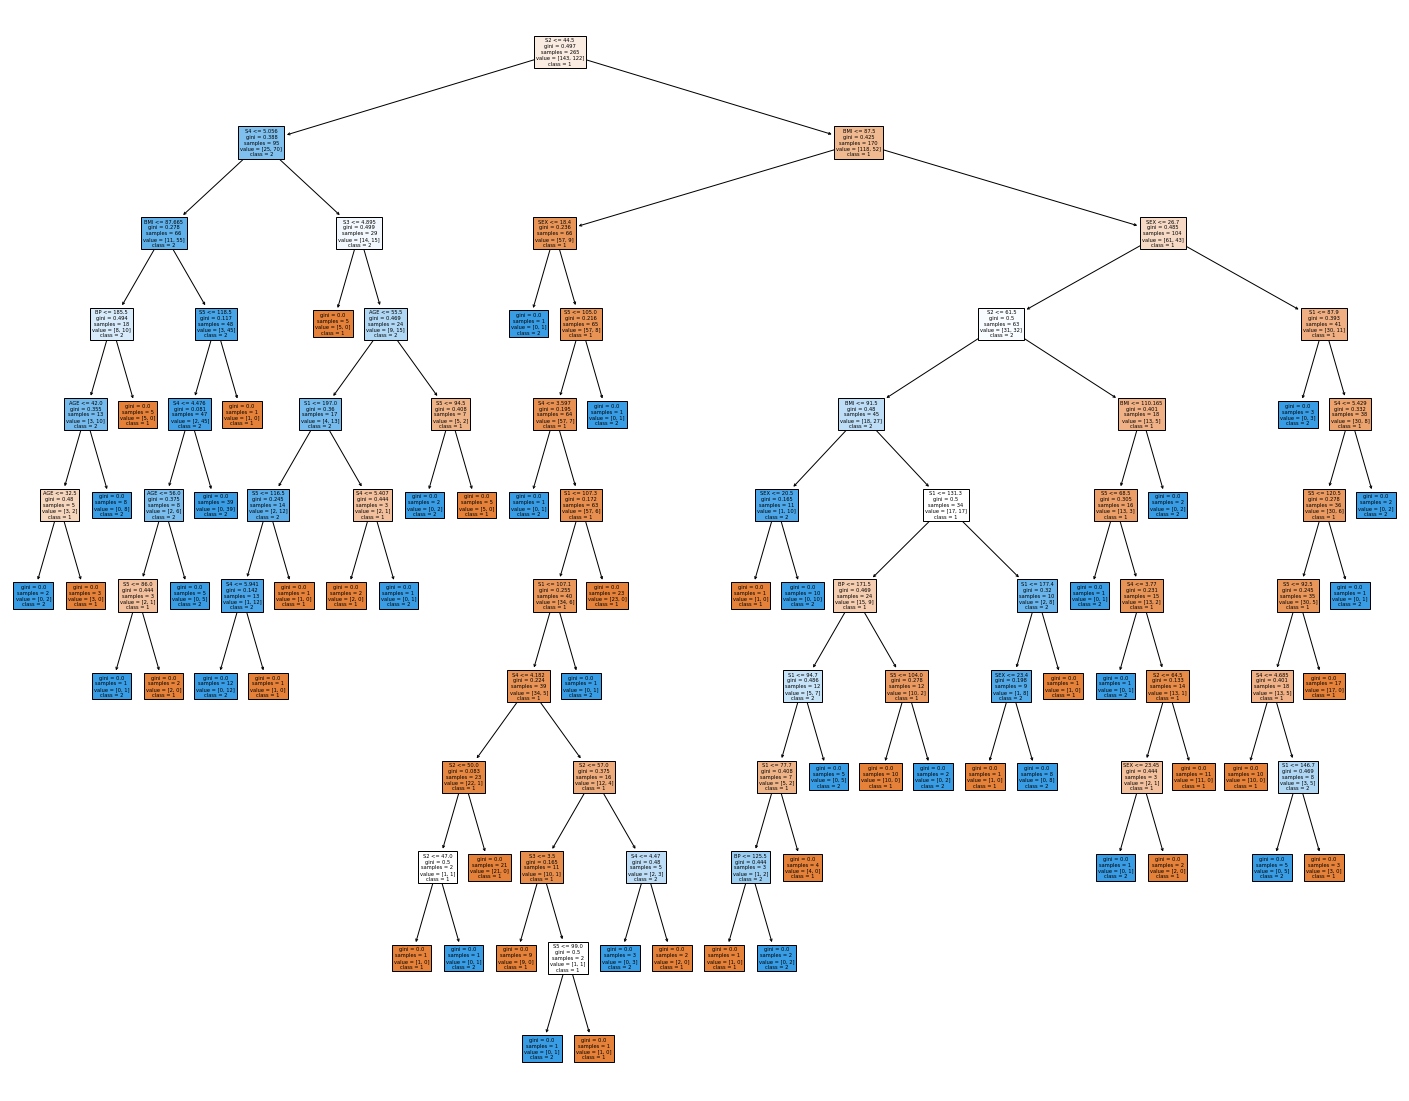

In [17]:
fig=plt.figure(figsize=(25,20))
fig=tree.plot_tree(decision_tree=classifier,feature_names=dataset.columns,class_names=['1','2'],filled=True)
plt.savefig("diabetes.jpg")